In [15]:
import numpy as np
import pandas as pd 

In [16]:
data = pd.read_csv('./data/cars.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [17]:
data.apply(lambda x: sum(x.isnull()))

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [18]:
# Create a pivot table to find the most common value of "Engine Fuel Type" for each car model
Engine_Fuel_Type  = data.pivot_table(values='Engine Fuel Type',
                                   columns='Model',
                                   aggfunc=lambda x: x.mode().iat[0])

# Create a Boolean mask that is True for rows where "Engine Fuel Type" is missing
miss_bool_Fuel_Type = data['Engine Fuel Type'].isnull() 

# Use the pivot table to fill in missing values with the most common value of "Engine Fuel Type" for that car model
data.loc[miss_bool_Fuel_Type,'Engine Fuel Type'] = data.loc[miss_bool_Fuel_Type,'Model'].apply(lambda x: Engine_Fuel_Type[x])

# Display the first few rows of the resulting DataFrame
data.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [19]:
from scipy.stats import mode
market_category  = data.pivot_table(values='Market Category',
                                   columns='Make',
                                   aggfunc=lambda x: x.mode().iat[0])
miss_bool_market = data['Market Category'].isnull() 
data.loc[miss_bool_market,'Market Category'] = data.loc[miss_bool_market,'Make'].apply(lambda x: market_category[x])

data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [20]:
df = data['Market Category'].str.get_dummies(sep=',')
df.head()

,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,0,0,0,1,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,1,0


In [21]:
data = pd.concat([data, df], axis=1)
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,...,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,0,0,0,1,0,0,1,0,1,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,0,0,0,0,0,0,0,0,1,1
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",...,0,0,0,0,0,0,1,0,1,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,0,0,0,0,0,0,0,0,1,1
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,...,0,0,0,0,0,0,0,0,1,0


In [22]:
data=data.drop('Market Category',axis=1)
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,1,0,0,1,0,1,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,1
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,1,0,1,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,1
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,0


In [23]:
#Split the data to x and y
y=data['MSRP']
x=data.drop('MSRP',axis=1)

set(x.Make)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Make'] = le.fit_transform(x['Make'])

In [24]:
category = []
category.append('Make')
category

['Make']

In [25]:
x.Make.value_counts()
x['Model'] = le.fit_transform(x['Model'])

In [26]:
category.append('Model')

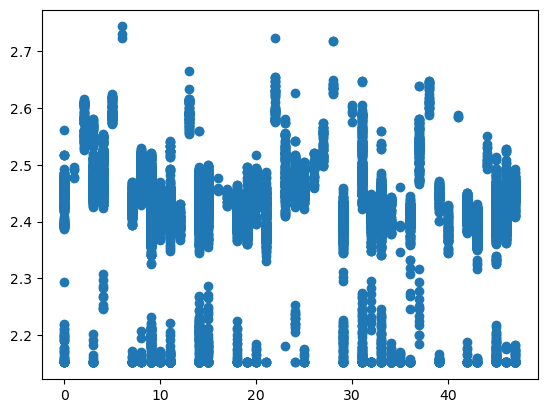

In [28]:
import matplotlib.pyplot as plt
plt.scatter(x.Make,np.log(y+1))
y=np.log(y+1)

In [29]:
x.Year.min(),x.Year.max()

(1990, 2017)

In [30]:
x['Year'] = pd.qcut(x['Year'], 5, labels=False)
x['Year']

0        1
1        1
2        1
3        1
4        1
        ..
11909    1
11910    1
11911    1
11912    2
11913    1
Name: Year, Length: 11914, dtype: int64

In [31]:
category.append('Year')

In [32]:
x['Engine Fuel Type'].value_counts()

regular unleaded                                7175
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [33]:
category.append('Engine Fuel Type')

In [34]:
x.loc[x['Engine Fuel Type'] == 'regular unleaded', 'Engine Fuel Type'] = 'regular'
x.loc[x['Engine Fuel Type'] == 'premium unleaded (required)', 'Engine Fuel Type'] = 'premium'
x.loc[x['Engine Fuel Type'] == 'premium unleaded (recommended)', 'Engine Fuel Type'] = 'premium'
x.loc[x['Engine Fuel Type'] == 'flex-fuel (unleaded/E85)', 'Engine Fuel Type'] = 'flex-fuel'
x.loc[x['Engine Fuel Type'] == 'flex-fuel (premium unleaded required/E85)', 'Engine Fuel Type'] = 'flex-fuel'
x.loc[x['Engine Fuel Type'] == 'flex-fuel (premium unleaded recommended/E85)', 'Engine Fuel Type'] = 'flex-fuel'
x.loc[x['Engine Fuel Type'] == 'flex-fuel (unleaded/natural gas)', 'Engine Fuel Type'] = 'flex-fuel'


In [35]:
x['Engine Fuel Type'] = le.fit_transform(x['Engine Fuel Type'])

In [36]:
x['Transmission Type'] = le.fit_transform(x['Transmission Type'])
category.append('Transmission Type')

In [37]:
x['Driven_Wheels'].value_counts()
x['Driven_Wheels'] = le.fit_transform(x['Driven_Wheels'])
category.append('Driven_Wheels')

In [38]:
x['Vehicle Size'].value_counts()
x['Vehicle Size'] = le.fit_transform(x['Vehicle Size'])
category.append('Vehicle Size')

In [39]:
x['Vehicle Style'].value_counts()
x['Vehicle Style'] = le.fit_transform(x['Vehicle Style'])
category.append('Vehicle Style')

In [40]:
x = pd.get_dummies(x, columns=category)
for count in category:
     x=x.drop(count + '_0',axis=1)
x

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Crossover,Diesel,Exotic,Factory Tuner,...,Vehicle Style_6,Vehicle Style_7,Vehicle Style_8,Vehicle Style_9,Vehicle Style_10,Vehicle Style_11,Vehicle Style_12,Vehicle Style_13,Vehicle Style_14,Vehicle Style_15
0,335.0,6.0,2.0,26,19,3916,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,300.0,6.0,2.0,28,19,3916,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,300.0,6.0,2.0,28,20,3916,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,230.0,6.0,2.0,28,18,3916,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,230.0,6.0,2.0,28,18,3916,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,300.0,6.0,4.0,23,16,204,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11910,300.0,6.0,4.0,23,16,204,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11911,300.0,6.0,4.0,23,16,204,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11912,300.0,6.0,4.0,23,16,204,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
dtr.fit(x_train,y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').